In [25]:
# from time_series_scripts import data_compress
import pandas as pd 
import numpy as np 

import sys
sys.path.append('../') # going a step back so the importer can find the following module
from time_series_scripts import data_compress_data as dcd
from time_series_scripts import data_compress as dc 
from time_series_scripts import cycle_count as cc 

# name = "user02_lab.csv" # - 13
# name = "user02_fluorescent.csv" # - 15
# name = "user02_fluorescent_led.csv" # - 13
# name = "user02_led.csv" # - python - 12 - esp 17
# name = "user02_natural.csv" # - python - 12 - esp 15 
class_num = 3
name = "user02_fluorescent_led.csv" # - python - 12 - esp 15 
# file_path = f'../../event_csv/compress_event_manhattan/class{class_num}/smooth_by_pca/compress_by_mean/{name}'
file_path = f'../../event_csv/split_data/class{class_num}/{name}'


In [26]:
df = pd.read_csv(file_path)

<Axes: >

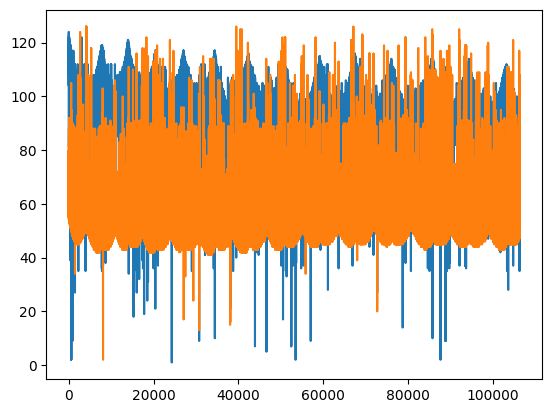

In [27]:
df['x'].plot()
df['y'].plot()

/home/rlwagun/Files/action_count_in_events3/all_code/time_series/../time_series_scripts/data_compress_data.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d1,d2 = compute_distance(row[1],row[2], df['x'][index+1],df['y'][index+1])
/home/rlwagun/Files/action_count_in_events3/all_code/time_series/../time_series_scripts/data_compress_data.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame([[temp_x/count,temp_y/count]], columns= ['x', 'y'])], ignore_index=True)
/home/rlwagun/Files/action_count_in_events3/all_code/time

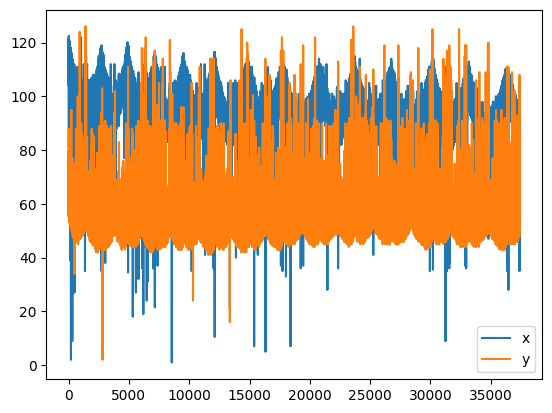

In [28]:
test_df = dcd.compress_by_Manhattan(df) 

<Axes: >

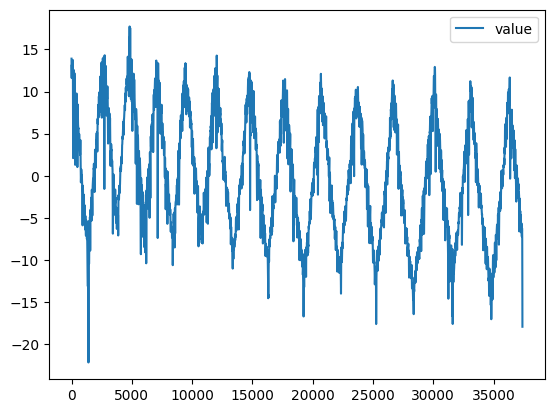

In [29]:
pca_df = dcd.dimensionality_reduction_PCA(test_df)
pca_df.plot()

<Axes: >

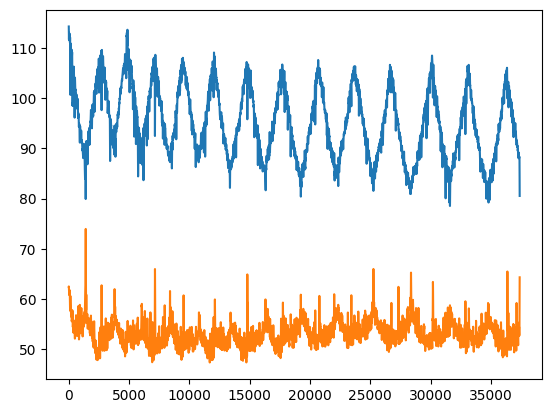

In [30]:
import statsmodels.api as sm 
_, smooth_x = sm.tsa.filters.hpfilter(test_df['x']) 
_, smooth_y = sm.tsa.filters.hpfilter(test_df['y']) 
smooth_x.plot()
smooth_y.plot()

<Axes: >

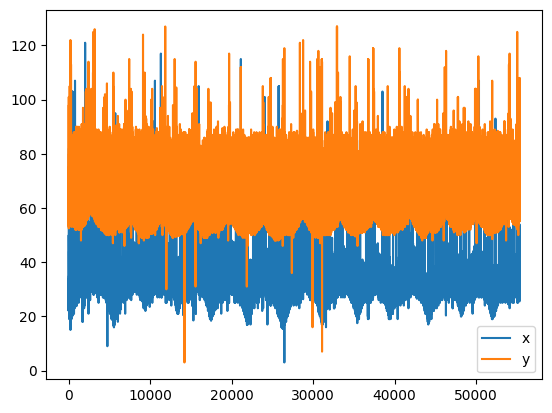

In [9]:
test_df.plot()

c:\Users\rlwagun\Desktop\Rhimesh\action_count_in_events3\all_code\time_series\..\time_series_scripts\data_compress_data.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d1,d2 = compute_distance(row[1],row[2], df['x'][index+1],df['y'][index+1])
c:\Users\rlwagun\Desktop\Rhimesh\action_count_in_events3\all_code\time_series\..\time_series_scripts\data_compress_data.py:96: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame([[temp_x/count, temp_y/count]], columns= ['x', 'y'])], ignore_index=True)
c:\Users\rlwagun\Desktop\Rhime

<Axes: >

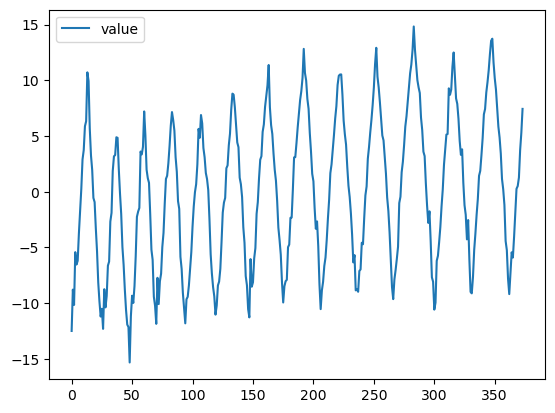

In [96]:

df = dcd.distance_mean_meanline(df)
df.plot()

<Axes: >

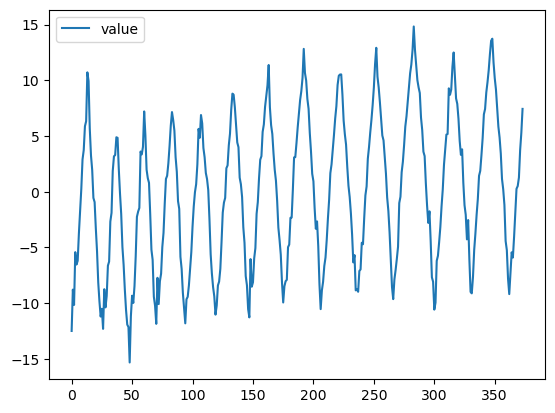

In [97]:
mean_df = df #pd.read_csv(file_path)
mean_df.plot()

In [98]:
mean_df.shape

(374, 1)

In [99]:
test_pca_data_df = mean_df['value'] # [:500]
win_change,top_win,win_size,step = cc.get_index_of_bottom_and_top_by_mk(test_pca_data_df)
print(
    "count from python ", 
    cc.get_dtw_mean_cost(win_change, top_win, test_pca_data_df))

count from python  13


count from python  13


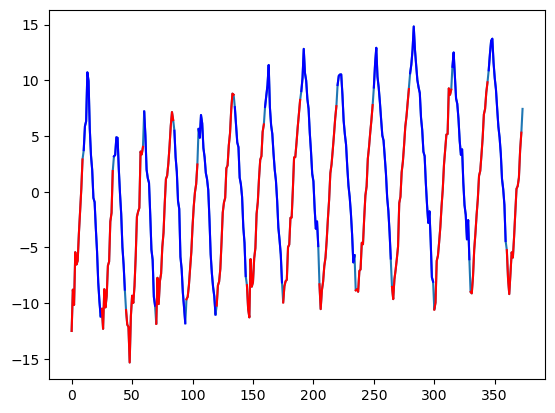

In [100]:
import matplotlib.pyplot as plt 
plt.plot(test_pca_data_df)
current = 0 
start = 0 
for i , (win, trend) in enumerate(zip(win_change, top_win)):
    if i == 0:
        start = win
        current = trend
        continue
    plt.plot(test_pca_data_df[start: win], color='red' if current else 'blue')
    start = win 
    current = trend 
print(
    "count from python ", 
    cc.get_dtw_mean_cost(win_change, top_win, test_pca_data_df))